In [1]:
from reader import Data
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [2]:
ds = Data(["voc_2007_train.txt"], shuffle=True, flip=False)

In [3]:
ds.imglist

['VOCdevkit/VOC2007/JPEGImages/000012.jpg 156 97 351 270 6',
 'VOCdevkit/VOC2007/JPEGImages/000017.jpg 185 62 279 199 14 90 78 403 336 12',
 'VOCdevkit/VOC2007/JPEGImages/000023.jpg 9 230 245 500 1 230 220 334 500 1 2 178 90 500 1 2 1 117 369 14 3 2 243 462 14 225 1 334 486 14',
 'VOCdevkit/VOC2007/JPEGImages/000026.jpg 90 125 337 212 6',
 'VOCdevkit/VOC2007/JPEGImages/000032.jpg 104 78 375 183 0 133 88 197 123 0 195 180 213 229 14 26 189 44 238 14',
 'VOCdevkit/VOC2007/JPEGImages/000033.jpg 9 107 499 263 0 421 200 482 226 0 325 188 411 223 0',
 'VOCdevkit/VOC2007/JPEGImages/000034.jpg 116 167 360 400 18 141 153 333 229 18',
 'VOCdevkit/VOC2007/JPEGImages/000035.jpg 1 96 191 361 14 218 98 465 318 14 468 195 500 317 14 3 304 500 375 10',
 'VOCdevkit/VOC2007/JPEGImages/000036.jpg 27 79 319 344 11',
 'VOCdevkit/VOC2007/JPEGImages/000042.jpg 263 32 500 295 18 1 36 235 299 18',
 'VOCdevkit/VOC2007/JPEGImages/000044.jpg 1 1 370 330 8 99 101 312 213 7',
 'VOCdevkit/VOC2007/JPEGImages/000047.j

In [4]:
ret = ds.generate_sample(1)

(9,)
(28,)
(600, 1, 791, 3)
(2,)
(2, 4)
(2,)
(1, 38, 50, 9)
(1, 38, 50, 9, 4)


In [5]:
image, img_shape, gt_boxes, gt_classes, rpn_labels, rpn_bbox_targets, all_anchors = ret

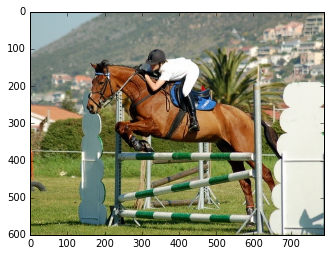

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.imshow(ret[0])

In [7]:
all_anchors = all_anchors.reshape(rpn_bbox_targets.shape)

In [8]:
from utils import *

In [9]:
_, feat_height, feat_width, anchor_num, _ = all_anchors.shape
_all_anchors = np.reshape(all_anchors, (feat_height * feat_width * anchor_num, 4))
_rpn_bbox_targets = np.reshape(rpn_bbox_targets, (feat_height * feat_width * anchor_num, 4))
_bbox_targets = bbox_transform_inv(_all_anchors, _rpn_bbox_targets)

In [10]:
bbox_targets = np.reshape(_bbox_targets, (1, feat_height, feat_width, anchor_num, 4))

In [11]:
rpn_labels.shape

(1, 38, 50, 9)

In [12]:
coords = np.where(rpn_labels==1)
coords

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([11, 12, 13, 14, 15, 16, 16, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19,
        19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21]),
 array([23, 23, 23, 23, 23, 23, 25, 24, 25, 26, 22, 23, 24, 25, 26, 27, 22,
        23, 24, 25, 26, 27, 22, 23, 24, 25, 26, 27, 22, 23, 24, 25, 26, 27]),
 array([7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

In [13]:
boxes = []
anchors = []
for idx in range(coords[0].shape[0]):
    boxes.append(bbox_targets[0, coords[1][idx], coords[2][idx], coords[3][idx]])
    anchors.append(all_anchors[0, coords[1][idx], coords[2][idx], coords[3][idx]])

In [15]:
len(boxes)

34

In [69]:
gt_boxes

array([[ 303.2967033 ,  100.54945055,  458.24175824,  326.37362637],
       [ 146.7032967 ,  126.92307692,  662.63736264,  552.1978022 ]])

In [70]:
all_anchors.shape

(1, 38, 50, 9, 4)

In [56]:
temp_anchors = all_anchors[:, :, :, 4, :][0][16][30:32]
temp_anchors.shape

(2, 4)

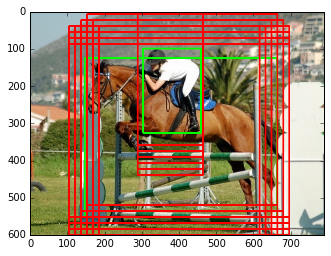

In [16]:
test = np.copy(image)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

for gt_box in gt_boxes:
    test = cv2.rectangle(test,
                  (int(gt_box[0]), int(gt_box[1])),
                  (int(gt_box[2]), int(gt_box[3])),
                  (0, 255, 0),
                  3)



# for anchor in temp_anchors:
for anchor in anchors:
    test = cv2.rectangle(test,
                  (int(anchor[0]), int(anchor[1])),
                  (int(anchor[2]), int(anchor[3])),
                  (255, 0, 0),
                  3)
plt.imshow(test)

In [17]:
anchors

[array([ 288.,    8.,  463.,  359.], dtype=float32),
 array([ 288.,   24.,  463.,  375.], dtype=float32),
 array([ 288.,   40.,  463.,  391.], dtype=float32),
 array([ 288.,   56.,  463.,  407.], dtype=float32),
 array([ 288.,   72.,  463.,  423.], dtype=float32),
 array([ 288.,   88.,  463.,  439.], dtype=float32),
 array([ 152.,    8.,  663.,  519.], dtype=float32),
 array([ 136.,   24.,  647.,  535.], dtype=float32),
 array([ 152.,   24.,  663.,  535.], dtype=float32),
 array([ 168.,   24.,  679.,  535.], dtype=float32),
 array([ 104.,   40.,  615.,  551.], dtype=float32),
 array([ 120.,   40.,  631.,  551.], dtype=float32),
 array([ 136.,   40.,  647.,  551.], dtype=float32),
 array([ 152.,   40.,  663.,  551.], dtype=float32),
 array([ 168.,   40.,  679.,  551.], dtype=float32),
 array([ 184.,   40.,  695.,  551.], dtype=float32),
 array([ 104.,   56.,  615.,  567.], dtype=float32),
 array([ 120.,   56.,  631.,  567.], dtype=float32),
 array([ 136.,   56.,  647.,  567.], dtype=flo